In [1]:
import pandas as pd
import statsmodels.api as sm
from pandas import Series, DataFrame, Panel
from string import ascii_lowercase as letters
from scipy.stats import chisqprob
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from scipy.stats import wrapcauchy
import matplotlib.pyplot as plt
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from functools import partial
np.random.seed(1234)

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def rw2(n):# this gives samples from weibull(5,2)
    x=np.zeros(n)
    y=np.zeros(n)
    theta=[0]*n
    theta[0]=wrapcauchy.rvs(c,loc=0,size=1)
    if theta[0]>2*math.pi:
            theta[0] = theta[0] - 2* math.pi
    if theta[0]<0:
            theta[0] = theta[0] + 2* math.pi
    for i in range(1,n):
        r=random.weibullvariate(alpha,beta)
        theta[i]=wrapcauchy.rvs(c,loc=theta[i-1],size=1)# c is the shape parameter
        if theta[i]>2*math.pi:
            theta[i] =theta[i] - 2* math.pi
        if theta[i]<0:
            theta[i] = theta[i] + 2* math.pi
        x[i]=x[i-1]+r*math.cos(theta[i])
        y[i]=y[i-1]+r*math.sin(theta[i])
    return(x,y)   
    
alpha=2#float(input("what's the scale?"))
beta=5#float(input("what's the shape?"))
n=100#int(input("how many steps?"))
#tries=int(input("how many tries?"))#  put tries=1  in order to properly save the list distance
data = rw2(n)
x=data[0]
y=data[1]
t=range(0,n)

In [3]:
# The Series datatype can also be used to represent time series

import datetime as dt
from pandas import date_range

today = dt.date.today()
days = date_range(today, periods=n, freq='S')
tx = Series(x,index=days)# here I should put my function
ty=Series(y,index=days)
#ty.columns=('date','seconds','x-coordinate')
dftx=pd.Series.to_frame(tx)
#print(dftx)
#print (tx, '\n') # Note - includes end time
#print (ty, '\n') # Note - includes end time


In [4]:
dftx=dftx.assign(coordinate=y)
#dftx.columns=['x-coordinate']


In [5]:
 d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d, dtype=np.int8)
df.columns=['column1','column2']# changing the names
R=range(0,2)
df.assign(y=R)


,column1,column2,y
0,1,3,0
1,2,4,1


In [6]:
#dftx.columns=['x-coordinate','y-coordinate'] It works! type this again when you run the code,for some reason it gets stuck
dftx.columns=['x-coordinate','y-coordinate']
#dftx

In [7]:
from datetime import datetime, timedelta
now = datetime.now()
print(now)
date=datetime(2009, 12, 4, 23, 3, 27, 343000)
print(now.microsecond)
print(date)

2018-02-22 17:59:30.545082
545082
2009-12-04 23:03:27.343000


In [8]:
print(now.strftime("%Y-%m-%d %H:%M:%S.%f").rstrip('0'))
print(now.strftime("%Y-%m-%d %H:%M:%S.%f"))#they're the same


2018-02-22 17:59:30.545082
2018-02-22 17:59:30.545082


In [9]:
# same thing, different code
span = timedelta(seconds=3662.567)
print(span)
date_fraction=timedelta(0, 3662, 567000)
print(date_fraction)

1:01:02.567000
1:01:02.567000


In [10]:
fraction_seconds=timedelta(seconds=0.1)# what I need,but it doesn't work below
print(fraction_seconds)
print(type(fraction_seconds))

0:00:00.100000
<class 'datetime.timedelta'>


In [11]:
date_fraction_seconds=datetime(2018, 2, 10, 0, 0, 0,1)# try something else,maybe this is the right format
print(date_fraction_seconds)

2018-02-10 00:00:00.000001


In [12]:
m=10*n
def rw2(m):# this gives samples from weibull(5,2)
    distance=[]
    x=np.zeros(m)
    y=np.zeros(m)
    for i in range(1,m):
        r=random.weibullvariate(alpha,beta)
        theta=2.*math.pi*random.random()
        x[i]=x[i-1]+r*math.cos(theta)
        y[i]=y[i-1]+r*math.sin(theta)
    return(x,y)   
    
alpha=2#float(input("what's the scale?"))
beta=5#float(input("what's the shape?"))
n=100#int(input("how many steps?"))
#tries=int(input("how many tries?"))#  put tries=1  in order to properly save the list distance
data_new = rw2(m)
x_new=data_new[0]
y_new=data_new[1]
print(len(data_new))
print(len(data_new[0]))

2
1000


In [13]:
#So we have n observations, so for every second we have a pair (x,y). We want now a subsample consisting of a 0.1 seconds step.
# Therefore instead of periods=n we have periods m=10*n
today = dt.date.today()
fraction_seconds = date_range(today, periods=m, freq='0.1S')
tx_new = Series(x_new,index=fraction_seconds)
ty_new=Series(y_new,index=fraction_seconds)
#print (tx_new, '\n') # Note - includes end time
#print (ty_new, '\n') # Note - includes end time

In [14]:
dftx_new=pd.Series.to_frame(tx_new)
dftx_new=dftx_new.assign(coordinate=y_new)
dftx_new.columns=['x-coordinate','y-coordinate']
#dftx_new

In [15]:
time_file=pd.DataFrame.to_csv(dftx_new)
# what now?? 

In [16]:
import csv
#csv.open("time_file")
#?csv
#open(time_file)

In [17]:
import matplotlib.pyplot as plt
from scipy import interpolate
x1 = np.arange(0, 10)
y1 = np.exp(-x1/3.0)
f1 = interpolate.interp1d(x1, y1)
#print(x1)


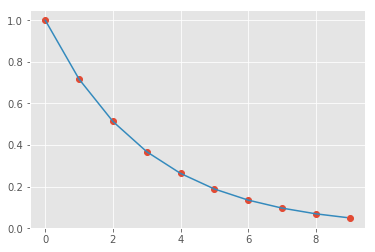

In [18]:
x1new = np.arange(0, 9, 0.1)
y1new = f1(x1new)   # use interpolation function returned by `interp1d`
plt.plot(x1, y1, 'o', x1new, y1new, '-')
plt.show()
#print(y1new)

In [19]:
#time_step=0.1
#f=interpolate.interp1d(x, y,kind='cubic')# that's my function for t=[0,n-1]
#t_new=np.arange(0,n-1,time_step)
# what now?

In [20]:
from scipy import interpolate
x2 = np.arange(-5.01, 5.01, 0.25)
y2 = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x2, y2)
z2 = np.sin(xx**2+yy**2)
f2 = interpolate.interp2d(x2, y2, z2, kind='cubic')
#Now use the obtained interpolation function and plot the result:


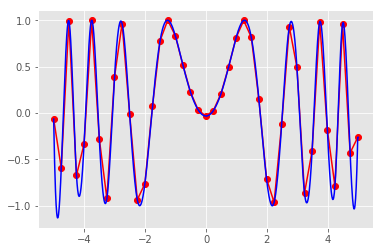

1002


In [21]:
import matplotlib.pyplot as plt
xnew2 = np.arange(-5.01, 5.01, 1e-2)
ynew2 = np.arange(-5.01, 5.01, 1e-2)
znew2 = f2(xnew2, ynew2)
plt.plot(x2, z2[0, :], 'ro-', xnew2, znew2[0, :], 'b-')
plt.show()
print(len(xnew2))

In [38]:
time_step=0.1
t_new=np.arange(0,n,time_step)
f=interpolate.interp1d(t,x,kind='cubic',fill_value="extrapolate")# ask colin here
g=interpolate.interp1d(t,y,kind='cubic',fill_value="extrapolate")

In [39]:
x_new=f(t_new)
y_new=g(t_new)


In [55]:
#get the distances now and the angles
r=np.zeros(len(x_new))# r the step-lengths
theta=np.zeros(len(x_new))# theta the angle
new_data=np.zeros(len(x_new))
for i in range(0,len(x_new)-1):
    r[i]=np.sqrt((x_new[i+1]-x_new[i])**2 + (y_new[i+1]-y_new[i])**2)
    theta[i]=math.atan2(y_new[i+1]-y_new[i], x_new[i+1]-x_new[i])
    new_data[i]=theta[i+1]-theta[i]# save the difference in the heading
data=r#have the same in the MCMC sampler    

In [52]:
# Now put them into the MCMC sampler, the second model is to be considered
def logweib(x,scale,shape):
    return np.sum(np.log((shape / scale) * (x )**(shape - 1) * np.exp(-((x )**shape)/scale)))
def log_wclikelihood(x,a,b):# maybe I should code this myself as x should be positive
     return sum(wrapcauchy.logpdf(x,c=a,loc=b))# c is the shape parameter

In [57]:
#MCMC sampler for the heading
# initial guess for theta(a) as array,these are shape(c) 
guess = 0.9
# Prepare storing MCMC chain as array of arrays.
A = [guess]
# define stepsize of MCMC.
stepsize = 0.035  # array of stepsizes
accepted  = 0.0
old_theta=guess# define initial values for theta 
old_loglik = log_wclikelihood(new_data,old_theta,0)#calculate the first log likelihood
# Metropolis-Hastings with 10,000 iterations.
for p in range(10000):
    new_theta = old_theta + stats.norm(0, stepsize).rvs() 
    #add the restraints on new_theta
    if new_theta<0 or new_theta>1: 
        continue
    new_loglik = log_wclikelihood(new_data,new_theta,0)
    # Accept new candidate in Monte-Carlo fashing.
    if (new_loglik > old_loglik):
        A.append(new_theta)
        accepted = accepted + 1.0  # monitor acceptance
        old_loglik=new_loglik
        old_theta=new_theta
    else:
        u = random.uniform(0.0,1.0)
        if (u < math.exp(new_loglik - old_loglik)):
            A.append(new_theta)
            accepted = accepted + 1.0  # monitor acceptance
            old_loglik=new_loglik
            old_theta=new_theta
        else:
            A.append(old_theta)
print("Acceptance rate = "+str(accepted/10000.0))

In [ ]:
#MCMC sampler for the step-lengths
import scipy.stats as stats
import numpy as np
#n=10000 #number of observations in a sample 
# initial guess for theta(a and b) as array.
guess = [5.0,2.0]
# Prepare storing MCMC chain as array of arrays.
A = [guess]
# define stepsize of MCMC.
stepsizes = [0.01,0.01]  # array of stepsizes
accepted  = 0.0
old_theta=guess# define initial values for theta 
old_loglik = log_likelihood(data,old_theta[0],old_theta[1])#calculate the first log likelihood
# Metropolis-Hastings with 10,000 iterations.
for p in range(10000):
    # Suggest new candidate from Gaussian proposal distribution.
    new_theta = old_theta + stats.norm(0, stepsizes).rvs() 
    #add the restraints on new_theta
    if new_theta[0]<0 or new_theta[1]<0: 
        continue
    new_loglik = log_likelihood(data,new_theta[0],new_theta[1])
    # Accept new candidate in Monte-Carlo fashing.
    if (new_loglik > old_loglik):
        A.append(new_theta)
        accepted = accepted + 1.0  # monitor acceptance
        old_loglik=new_loglik
        old_theta=new_theta
    else:
        u = random.uniform(0.0,1.0)
        if (u < math.exp(new_loglik - old_loglik)):
            A.append(new_theta)
            accepted = accepted + 1.0  # monitor acceptance
            old_loglik=new_loglik
            old_theta=new_theta
        else:
            A.append(old_theta)
print("Acceptance rate = "+str(accepted/10000.0))